# 2.- Indicadores de Tendencia
#### ¿Qué es un Indicador de Tendencia?
Un indicador de tendencia es una herramienta de análisis técnico utilizada para identificar la dirección general del mercado o de un activo específico (como una acción, un índice o una criptomoneda). Los indicadores de tendencia ayudan a determinar si el mercado está en una tendencia alcista (precios subiendo), bajista (precios bajando) o lateral (precios moviéndose dentro de un rango sin una dirección clara).

#### ¿Por Qué Son Importantes?

- Identificación de la Dirección del Mercado: Los indicadores de tendencia ayudan a identificar si el mercado está subiendo, bajando o moviéndose de manera lateral. Esto es crucial para tomar decisiones informadas sobre cuándo comprar, vender o mantener una posición.
- Reducción del Ruido del Mercado: En el corto plazo, los precios pueden fluctuar de manera caótica debido a múltiples factores. Los indicadores de tendencia suavizan estas fluctuaciones para mostrar una visión más clara de la dirección general.
- Confirmación de la Tendencia: Ayudan a confirmar la dirección de la tendencia observada, lo que puede ser útil para validar las decisiones comerciales.
- Señales de Entrada y Salida: Proporcionan señales sobre cuándo entrar o salir del mercado. Por ejemplo, cuando una acción cruza una media móvil hacia arriba, podría ser una señal de compra, y cuando cruza hacia abajo, podría ser una señal de venta.

#### Algunos ejemplos de indicadores de tendencia
- Media Móvil Simple (SMA)
- Media Móvil Exponencial (EMA)
- Media Móvil Ponderada (WMA)
- Bandas de Bollinger
- Indicador de Convergencia/Divergencia de Medias Móviles (MACD)
- Parabolic SAR
- Índice Direccional Medio (ADX)

#### ¿Cuales estudiaremos aquí?
- Medias móviles
- ADX
- Bandas de Bollinger



## 2.1.- Medias Moviles
Las medias móviles son indicadores de análisis técnico que suavizan los precios de un activo a lo largo de un período de tiempo específico para identificar la dirección general de la tendencia. Hay varios tipos de medias móviles, pero las dos más comunes son la Media Móvil Simple (SMA) y la Media Móvil Exponencial (EMA).

### 2.1.1 Simple Moving Average - Media Móvil Simple - _(SMA)_

**Descipción:** 

La Media Móvil Simple (SMA) es el promedio aritmético de los precios de cierre de un activo durante un período de tiempo específico. Se utiliza para suavizar los datos de precios y reducir el "ruido" para identificar la tendencia subyacente.

**Formula:**

La fórmula para la Media Móvil Simple (SMA) es:

$$
\text{SMA} = \frac{P_1 + P_2 + \ldots + P_n}{n}
$$

Donde:
- P1, P2, ..., Pn son los precios de cierre de los últimos n días.
- n es el número de días del período.

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre |
|-----|------------------|
| 1   | 20               |
| 2   | 21               |
| 3   | 22               |
| 4   | 23               |
| 5   | 24               |

La SMA de 5 días se calcula como:

$$
\text{SMA} = \frac{20 + 21 + 22 + 23 + 24}{5} = 22
$$

**Algoritmo:**
1. Suma los precios de cierre de los últimos \( n \) días.
2. Divide la suma entre \( n \) para obtener la SMA.



In [67]:
# traemos los datos

import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np 

# EJEMPLO CON YAHOO FINANZAS
ticker_symbol = 'BTC-USD'
ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
years=5
end_date= dt.datetime.now() # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los ultimos datos
start_date = end_date- dt.timedelta(365*years) # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los primeros datos
period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
data = ticker.history(start=start_date, end=end_date, interval=interval)
# ticker_data=ticker.history(period=period, interval=interval)
# print(ticker_data)
# data.head()

In [68]:
# cogemos los valores de los precios de cierre
close_prices = data['Close'].values

# creamso un array del tamaño de los precios de cierre con valores nan
sma_50_calculada = np.full_like(close_prices, np.nan)

# definimos el periodo de la media movil
periodo = 50

for i in range(close_prices.size):
    if i >= periodo-1:
        slice_data = close_prices[i - periodo + 1:i + 1]
        sma_50_calculada[i] = np.nanmean(slice_data)  # Calcula la media ignorando NaNs usando np.nanmean
    else:
        sma_50_calculada[i] = np.nan
        # sma_50_calculada[i] = close_prices[i-periodo:i].mean()


C:\Users\macPRO\AppData\Local\Temp\ipykernel_9196\1893642890.py:12: RuntimeWarning:

Mean of empty slice.

c:\Users\macPRO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [59]:
# SMA Pandas

periodos = 50
data['SMA_50'] = data['Close'].rolling(window=periodos).mean()

# Mostrar los primeros 10 registros con la SMA calculada
# data.head()


In [60]:
# SMA Pandas TA
data['SMA_50_ta'] = ta.sma(data['Close'], length=periodos)

In [61]:
# miramos si ambas son iguales
son_iguales = data['SMA_50'].equals(data['SMA_50_ta'])

if son_iguales:
    print("Las dos SMAs son iguales.")
else:
    print("Las dos SMAs son diferentes.")

Las dos SMAs son iguales.


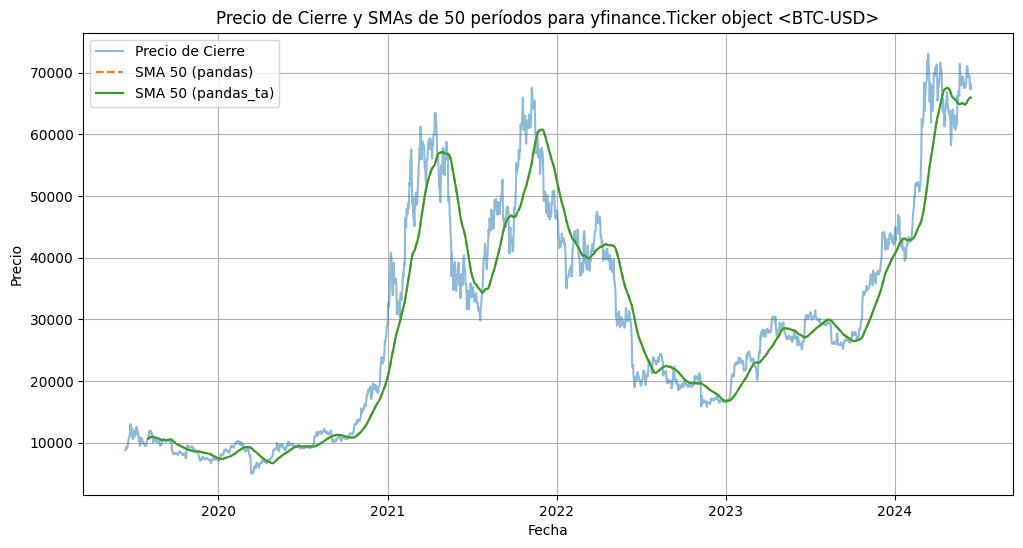

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data['SMA_50'], label='SMA 50 (pandas)', linestyle='--')
plt.plot(data.index, data['SMA_50_ta'], label='SMA 50 (pandas_ta)')
plt.title(f'Precio de Cierre y SMAs de 50 períodos para {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], 
                         mode='lines', name='SMA 50', 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y SMA 50 ({ticker})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True,  # Mostrar slider de zoom
                  template='plotly_dark')  # Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()

### Media Móvil Exponencial (EMA)


### 2.1.2 Exponential Moving Average - Media Móvil Exponencial - _EMA_

**Descripcion:**

**Formula:**

**Ejemplo numérico:**

**Algoritmo:**


### 2.1.3 Weighted Moving Average - Media Móvil Ponderada - _WMA_

**Descripcion:**

**Formula:**

**Ejemplo numérico:**

**Algoritmo:**
